In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Reload the dataset with proper delimiter
url = "https://archive.ics.uci.edu/static/public/360/data.csv"
dataset = pd.read_csv(url, delimiter=',', header=0)

# Check the columns again to ensure they are properly split
print(dataset.columns)


# Check the first few rows of the dataset
print(dataset.head())


Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')
        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  3/10/2004  18:00:00     2.6         1360       150      11.9   
1  3/10/2004  19:00:00     2.0         1292       112       9.4   
2  3/10/2004  20:00:00     2.2         1402        88       9.0   
3  3/10/2004  21:00:00     2.2         1376        80       9.2   
4  3/10/2004  22:00:00     1.6         1272        51       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0           1046      166          1056      113          1692         1268   
1            955      103          1174       92          1559          972   
2            939      131          1140      114          1555         1074   
3            948      172          1092      122          1584       

In [ ]:
# Replace the invalid '-200' values with NaN (this represents missing data)
dataset.replace(-200, np.nan, inplace=True)

# Checking for missing values after replacing -200 with NaN
print("Missing values after replacing -200 with NaN:")
print(dataset.isnull().sum())

# Option 1: Drop rows with any NaN values (you can also fill them, but for now, we'll drop)
dataset.dropna(inplace=True)

# Option 2: Fill missing values with the mean or median (if you prefer to fill instead of dropping)
# dataset.fillna(dataset.mean(), inplace=True)

# Check if any missing values remain
print("Missing values after cleaning:")
print(dataset.isnull().sum())


Missing values after replacing -200 with NaN:
Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64
Missing values after cleaning:
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [ ]:
# Drop non-numeric columns like 'Date' and 'Time'
dataset = dataset.drop(columns=['Date', 'Time'])

# Ensure all remaining columns are numeric (if any are not, they will be ignored)
dataset = dataset.apply(pd.to_numeric, errors='coerce')

# Set up the features (X) and target variable (y)
X = dataset.drop('CO(GT)', axis=1)  # All columns except 'CO(GT)' as features
y = dataset['CO(GT)']  # 'CO(GT)' as the target variable

# Split the data into training and testing sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler (optional but recommended for some algorithms)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check the shapes of the split data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (661, 12)
X_test shape: (166, 12)


In [ ]:
# List of models to test
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = [
    ('Linear Regression', LinearRegression()),
    ('Support Vector Regression', SVR()),
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor())
]

# Evaluate each model using cross-validation
from sklearn.model_selection import cross_val_score, KFold

results = []
names = []

# KFold cross-validation
kfold = KFold(n_splits=10, random_state=42, shuffle=True)

# Iterate over models and evaluate them
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')  # MAE for regression
    results.append(cv_results)
    names.append(name)

# Print out results
for name, result in zip(names, results):
    print(f"{name}: Mean MAE = {result.mean():.4f}, Standard Deviation = {result.std():.4f}")


Linear Regression: Mean MAE = -0.1662, Standard Deviation = 0.0181
Support Vector Regression: Mean MAE = -0.1549, Standard Deviation = 0.0208
Decision Tree Regressor: Mean MAE = -0.2477, Standard Deviation = 0.0197
Random Forest Regressor: Mean MAE = -0.1771, Standard Deviation = 0.0227


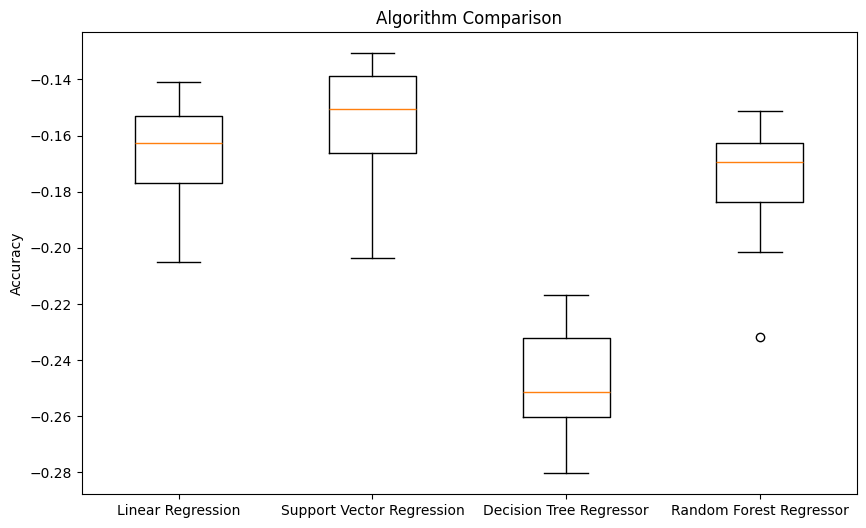

In [ ]:
# Boxplot to compare the accuracy scores of the models
plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
import joblib
from sklearn.model_selection import cross_val_score, KFold

# List of models to test
models = [
    ('Linear Regression', LinearRegression()),
    ('Support Vector Regression', SVR()),
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor())
]

# KFold cross-validation
kfold = KFold(n_splits=10, random_state=42, shuffle=True)

# Initialize variables to store best model and its score
best_model = None
best_score = float('inf')  # Initialize with a very high score (for MAE, lower is better)

# Iterate over models and evaluate them
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')  # MAE for regression
    mean_score = cv_results.mean()

    # Check if this model has the best score (lower is better)
    if mean_score < best_score:
        best_score = mean_score
        best_model = model
        best_model_name = name

# Train the best model on the entire training data
best_model.fit(X_train, y_train)

# Save the best model using joblib
joblib.dump(best_model, 'best_model.pkl')

print(f"Best Model: {best_model_name}")
print(f"Best MAE Score: {-best_score:.4f}")  # Convert back to positive MAE


Best Model: Decision Tree Regressor
Best MAE Score: 0.2441


In [ ]:
import pandas as pd
import numpy as np

# Define a predefined input (ensure the features are in the same order as in X_train)
# For example, let's assume the features are ['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', ...]
# Make sure the input matches the number of features in X_train
predefined_input = pd.DataFrame({
    'PT08.S1(CO)': [5.1],  # Replace with actual value
    'NMHC(GT)': [0.4],     # Replace with actual value
    'C6H6(GT)': [0.3],     # Replace with actual value
    'PT08.S2(NMHC)': [1.2],  # Replace with actual value
    'NOx(GT)': [2.0],      # Replace with actual value
    'PT08.S3(NOx)': [0.1],  # Replace with actual value
    'NO2(GT)': [1.5],      # Replace with actual value
    'PT08.S4(NO2)': [2.1],  # Replace with actual value
    'PT08.S5(O3)': [1.0],   # Replace with actual value
    'T': [0.8],             # Replace with actual value
    'RH': [1.6],            # Replace with actual value
    'AH': [20.5]            # Replace with actual value
})

# Scale the input data (use the same scaler that was used on the training data)
predefined_input_scaled = scaler.transform(predefined_input)

# Make a prediction using the best model
prediction = best_model.predict(predefined_input_scaled)

# Output the prediction
print(f"Prediction: {prediction[0]}")


Prediction: 0.3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Assuming your path is something like 'mydrive-aadit_b12' inside Google Drive
path = '/content/drive/MyDrive/Colab Notebooks/best_model.sav'

import joblib
joblib.dump(best_model, path)


['/content/drive/MyDrive/Colab Notebooks/best_model.sav']